In [34]:
import numpy as np
import elimination_ordering_nx as eo
import time, pickle
from os import listdir
from os.path import isfile, join
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors

import importlib
importlib.reload(eo)

<module 'elimination_ordering_nx' from '/users/baribowo/Code/Python/eli/elimination_ordering_nx.py'>

q = [ 2  4  8 16 32 64]
p = [ 2  4  8 16 32 64]


==================Length of stack's elements after stack modification==================

=-=-=--=-=-=-=--=--=-=
<><><> Grid with p = 2 q = 2 <><><>

>>>>>Statistics<<<<<<
Total number of times each rule in Normalize stage is effective for all rounds:
Rule 1 :  3 times
Rule 2 :  0 times
Rule 3 :  0 times
Rule 4 :  1 times
Rule 5 :  0 times
Rule 6 :  0 times
Total number of hits in all loops (one loop counts as 1 (includes any O(constant) operations)) =  9
computation for grid 2 x 2 is finished!

=-=-=--=-=-=-=--=--=-=
<><><> Grid with p = 4 q = 4 <><><>
after separate stage:  [4] , mean component size =  4

>>>>>Statistics<<<<<<
Total number of times each rule in Normalize stage is effective for all rounds:
Rule 1 :  3 times
Rule 2 :  0 times
Rule 3 :  3 times
Rule 4 :  6 times
Rule 5 :  0 times
Rule 6 :  0 times
Total number of vertices placed in Separate stage per round:
Round 1 : 4 of 12 vertices
Total number of hits in all loops (one

after separate stage:  [4] , mean component size =  4
after separate stage:  [4, 2148] , mean component size =  1076
after separate stage:  [4, 1050, 2148] , mean component size =  1067
after separate stage:  [4, 497, 1050, 2148] , mean component size =  925
after separate stage:  [4, 228, 497, 1050, 2148] , mean component size =  785
after separate stage:  [4, 96, 228, 497, 1050, 2148] , mean component size =  670
after separate stage:  [4, 39, 96, 228, 497, 1050, 2148] , mean component size =  580
after popping top:  [4, 96, 228, 497, 1050, 2148] , mean component size =  670
after separate stage:  [4, 13, 96, 228, 497, 1050, 2148] , mean component size =  577
after popping top:  [4, 96, 228, 497, 1050, 2148] , mean component size =  670
after popping top:  [4, 228, 497, 1050, 2148] , mean component size =  785
after separate stage:  [4, 14, 228, 497, 1050, 2148] , mean component size =  657
after separate stage:  [4, 14, 51, 228, 497, 1050, 2148] , mean component size =  570
after po

after separate stage:  [4, 25, 100, 204, 244, 1032] , mean component size =  268
after separate stage:  [4, 25, 60, 100, 204, 244, 1032] , mean component size =  238
after separate stage: [4,25,32, ...(213)... ,204,244,1032]
after popping top:  [4, 25, 60, 100, 204, 244, 1032] , mean component size =  238
after separate stage: [4,20,25, ...(211)... ,204,244,1032]
after popping top:  [4, 25, 60, 100, 204, 244, 1032] , mean component size =  238
after popping top:  [4, 25, 100, 204, 244, 1032] , mean component size =  268
after separate stage:  [4, 25, 27, 100, 204, 244, 1032] , mean component size =  234
after popping top:  [4, 25, 100, 204, 244, 1032] , mean component size =  268
after popping top:  [4, 25, 204, 244, 1032] , mean component size =  302
after separate stage:  [4, 25, 27, 204, 244, 1032] , mean component size =  256
after separate stage:  [4, 25, 27, 48, 204, 244, 1032] , mean component size =  226
after popping top:  [4, 25, 27, 204, 244, 1032] , mean component size =  2

values of m: [3.88,3.88,3.88, ...(5)... ,8.18,8.18,8.18]
computation for grid 64 x 64 is finished!


==================Separators visualization==================

<><><> Separators for p = 4 q = 4 <><><>


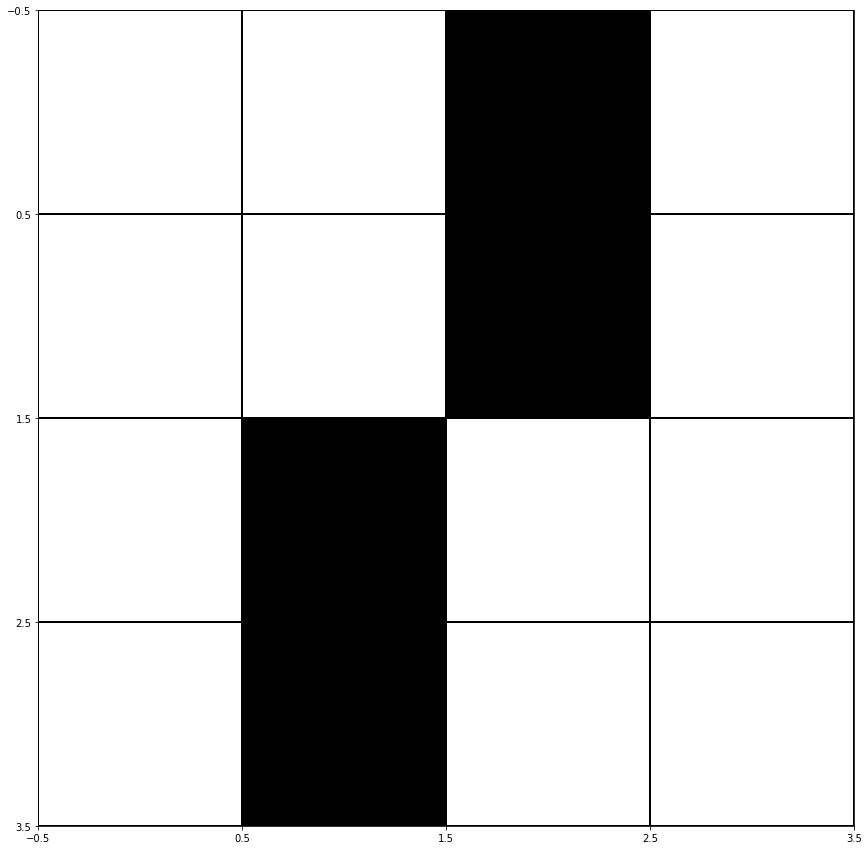


<><><> Separators for p = 8 q = 8 <><><>


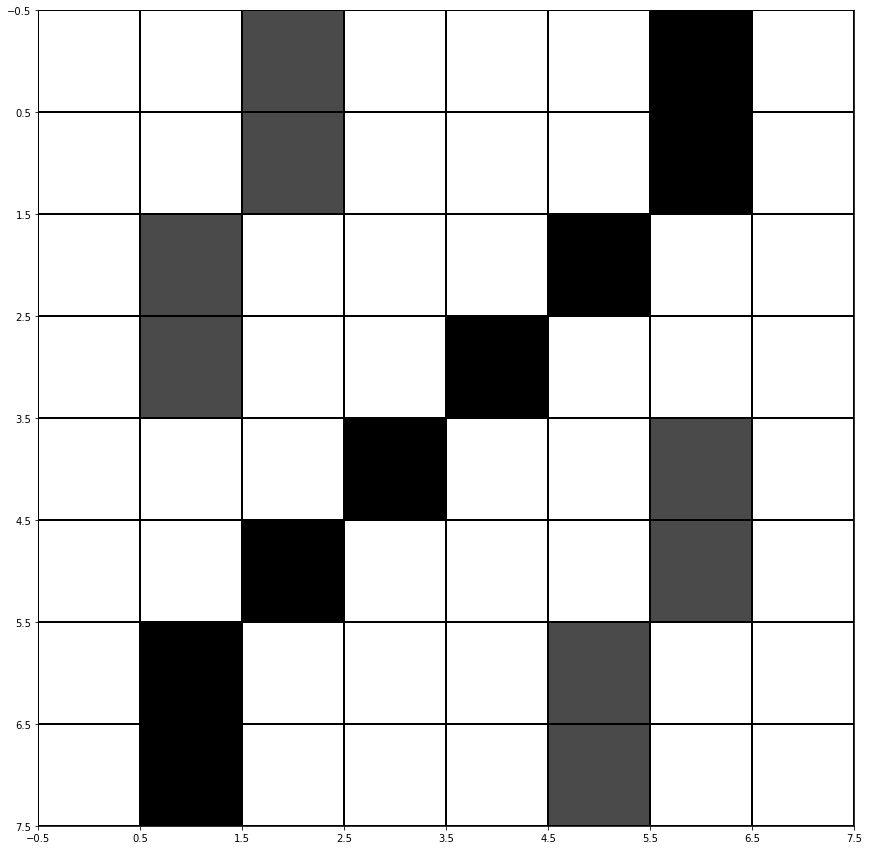


<><><> Separators for p = 16 q = 16 <><><>


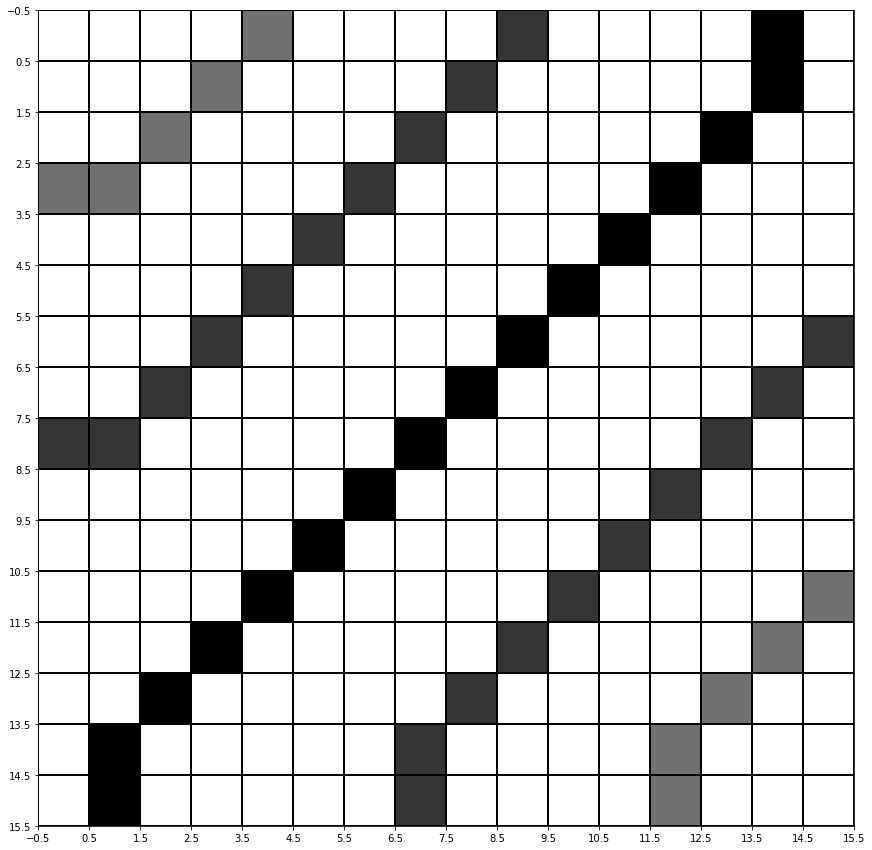


<><><> Separators for p = 32 q = 32 <><><>


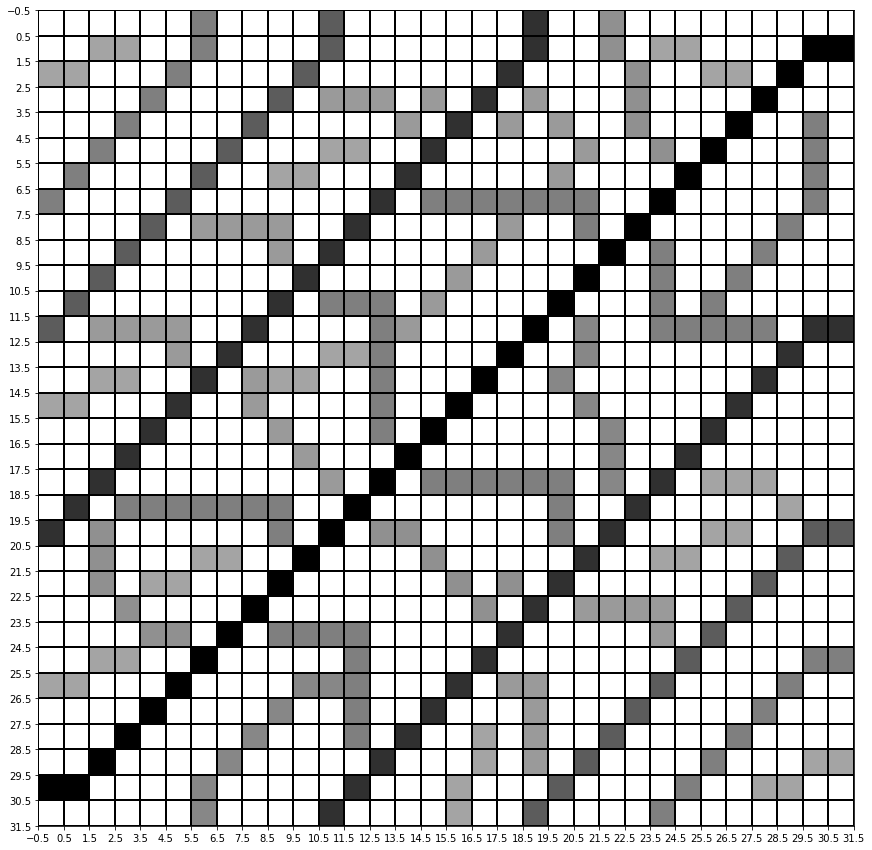


<><><> Separators for p = 64 q = 64 <><><>


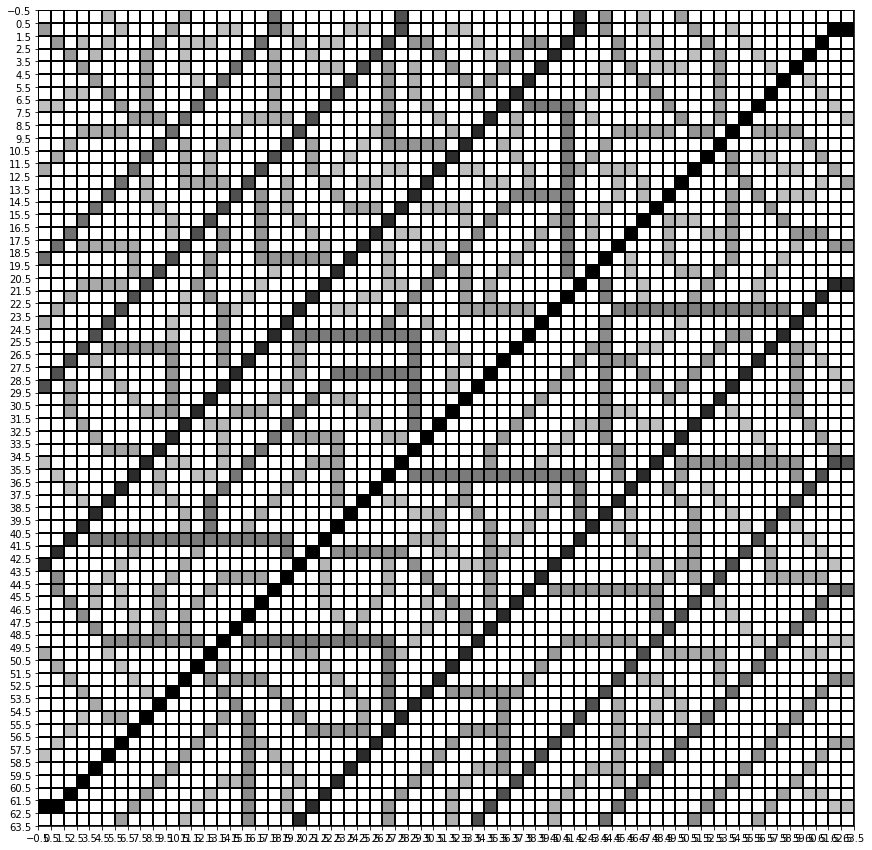

In [35]:
plt.rcParams["figure.figsize"] = (20,15)
k = np.array(list(range(1,7)))
q = p = np.power(2,k)
print("q =",q)
print("p =",p)
info = {
    "R_counts":[],
    "separate_placed_rounds":[],
    "Nks":[]
       }
print("\n\n==================Length of stack's elements after stack modification==================")
for i in range(len(p)):
    print("\n=-=-=--=-=-=-=--=--=-=")
    print("<><><> Grid with p =",p[i],"q =",q[i],"<><><>")
    grid = eo.grid_generator(p[i],q[i]) #generate grid matrix

    #elimination ordering:
    EO = eo.elimination_ordering_class(grid, visualization=True, p=p[i], q=q[i]) #must be on global scope
    #e, R_counts, separate_placed_rounds = EO.elimination_ordering(grid) #if visualization=True
    e = EO.elimination_ordering()
    #info["R_counts"].append(R_counts); info["separate_placed_rounds"].append(separate_placed_rounds)
    info["Nks"].append(EO.Nks)
    
    print("computation for grid",p[i],"x",q[i],"is finished!")
    
#display the separator grids:
print("\n\n==================Separators visualization==================")
for i in range(len(p)):
    if len(info["Nks"][i]) > 0:
        print("\n<><><> Separators for p =",p[i],"q =",q[i],"<><><>")
        eo.generate_separator_display(p[i], q[i], info["Nks"][i])